# PCA

## MNIST 
Датасет рукописных цифр. 

* Каждая цифра - черно-белая картинка 8x8 пикселей, закодированная массивом из 64 ячеек
* Каждая ячейка - цифра от 0 до 16, описывающая градацию серого цвета в этой ячейки
* Количество экземпляров: 1797
* Количество классов: 10
* Количество экземпляров на класс: ~180

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

In [5]:
from sklearn import datasets
digits = datasets.load_digits()
X_digits = digits.data

In [6]:
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

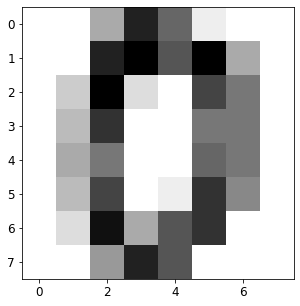

In [7]:
plt.imshow(X_digits[0].reshape(8, 8), cmap=plt.cm.binary)

## Уменьшим размерность

Text(0, 0.5, 'explained_variance_ratio_')

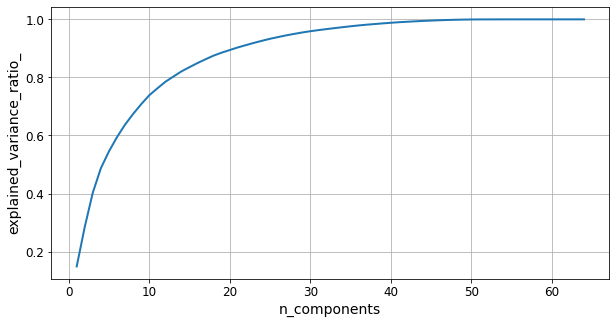

In [8]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_digits)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [9]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_ * 100

array([14.89059358, 13.61877124, 11.79459376,  8.40997942,  5.78241466,
        4.91691032,  4.31598701,  3.66137258,  3.3532481 ,  3.07880621,
        2.37234084,  2.27269657,  1.82186331,  1.77385494,  1.46710109,
        1.4097156 ,  1.3185892 ,  1.24813782,  1.01771796,  0.90561744,
        0.88953846,  0.79712316,  0.76749325,  0.72290357,  0.69588885,
        0.59608146,  0.57561469,  0.51515758,  0.48953978,  0.42888797,
        0.37360605,  0.35327422,  0.33668399,  0.32802985,  0.30832088,
        0.29377863,  0.25658861,  0.2277424 ,  0.22227792,  0.21143039,
        0.18990906,  0.15865291,  0.15115993,  0.14057876,  0.11662229,
        0.10749252,  0.09640531,  0.07746303,  0.05572116,  0.04043307,
        0.02099163,  0.00824797,  0.0052515 ,  0.00505244,  0.00329961,
        0.00124365,  0.00070483,  0.00030143,  0.00010623,  0.00005501,
        0.00003429,  0.        ,  0.        ,  0.        ])

##### Уже на 40 компонентах мы объяснили почти весь variance.

In [10]:
from sklearn.preprocessing import binarize
bin_X = binarize(X_digits).sum(axis=0)  # считаем сколько раз активизировалась каждая из 64 ячеек

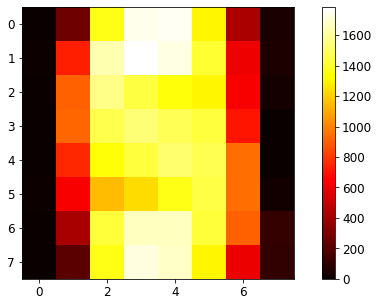

In [11]:
plt.imshow(bin_X.reshape(8, 8), cmap=plt.cm.hot)
plt.colorbar();

### 95% variance.

In [12]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [13]:
d # количество компонент объясняющих 95 % variance.

29

#### Вариант №2

In [15]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_digits)

In [16]:
pca.n_components_

29

#### Востановление после декомпозиции

Original


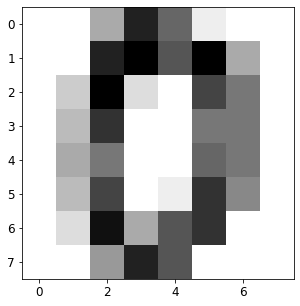

In [17]:
plt.imshow(X_digits[0].reshape(8, 8), cmap=plt.cm.binary);
print("Original")

In [18]:
X_recovered = pca.inverse_transform(X_reduced) # востановление

Compressed


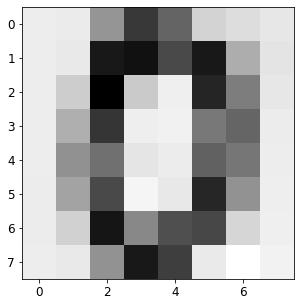

In [19]:
plt.imshow(X_recovered[0].reshape(8, 8), cmap=plt.cm.binary);
print('Compressed')